# The Spark Foundation Internship

# Task 2:Prediction Using Un Supervised ML
From the given ‘Iris’ dataset, we need to predict the optimum number of clusters
and represent it visually.

# Author:RAHUL RUDRA

# Importing The packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Data

In [7]:
data = pd.read_csv('Iris.csv')

# Data Exploration

In [8]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
data.shape

(150, 6)

In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Finding the optimum number of clusters

In [14]:
X = data.iloc[:, [1,2,3,4]].values

In [15]:
from sklearn.cluster import KMeans

In [16]:
def elbowMethod(num_clusters, inertias):
    plt.plot(num_clusters, inertias)
    plt.title("ELBOW METHOD")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertias")
    plt.show()

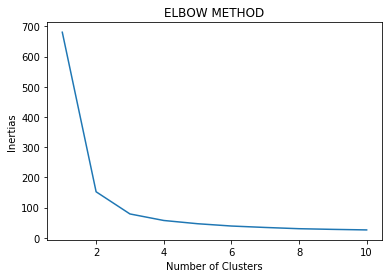

In [17]:
inertias = []
clusters = range(1,11)

for i in clusters:
    kmeans = KMeans(n_clusters = i, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
elbowMethod(clusters, inertias)

In [18]:
kmeans = KMeans(n_clusters = 3, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

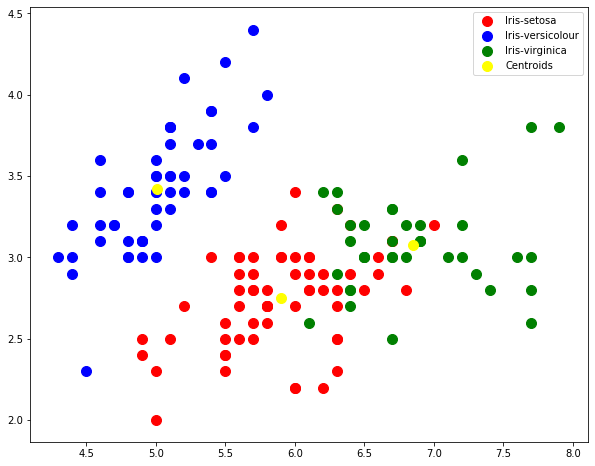

In [19]:
plt.figure(figsize = (10,8))

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()